In [38]:
import cv2
import matplotlib as mt
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from cv2 import imread, imshow
from imgaug import augmenters as iaa
from util import utils
from numpy import fft
from skimage import data, exposure, img_as_float

In [39]:
def RGBAlgorithm(rgb_img, value=0.5, basedOnCurrentValue=True):
    img = rgb_img * 1.0
    img_out = img
    
    # 基于当前RGB进行调整（RGB*alpha）
    if basedOnCurrentValue:
        # 增量大于0，指数调整
        if value >= 0 :
            alpha = 1 - value
            alpha = 1/alpha
 
        # 增量小于0，线性调整
        else:
            alpha = value + 1
            
        img_out[:, :, 0] = img[:, :, 0] * alpha
        img_out[:, :, 1] = img[:, :, 1] * alpha
        img_out[:, :, 2] = img[:, :, 2] * alpha
            
    # 独立于当前RGB进行调整（RGB+alpha*255）
    else:
        alpha = value
        img_out[:, :, 0] = img[:, :, 0] + 255.0 * alpha
        img_out[:, :, 1] = img[:, :, 1] + 255.0 * alpha
        img_out[:, :, 2] = img[:, :, 2] + 255.0 * alpha
        
    img_out = img_out/255.0
    
    # RGB颜色上下限处理(小于0取0，大于1取1)
    mask_3 = img_out  < 0 
    mask_4 = img_out  > 1
    img_out = img_out * (1-mask_3)
    img_out = img_out * (1-mask_4) + mask_4
    
    return img_out

def wiener(input, PSF, eps, K=0.01):        # 维纳滤波，K=0.01
    input_fft = fft.fft2(input)
    PSF_fft = fft.fft2(PSF) + eps
    PSF_fft_1 = np.conj(PSF_fft) / (np.abs(PSF_fft) ** 2 + K)
    result = fft.ifft2(input_fft * PSF_fft_1)
    result = np.abs(fft.fftshift(result))
    return result


iaa.WithColorspace(
    to_colorspace="HSV",
    from_colorspace="RGB",
    children=iaa.WithChannels(0, iaa.Add((10, 50)))
)

WithColorspace(from_colorspace=RGB, to_colorspace=HSV, name=UnnamedWithColorspace, children=[Sequential(name=UnnamedWithColorspace-then, random_order=False, children=[WithChannels(channels=[0], name=UnnamedWithChannels, children=Sequential(name=UnnamedWithChannels-then, random_order=False, children=[Add(name=UnnamedAdd, parameters=[Uniform(Deterministic(int 10), Deterministic(int 50)), Deterministic(int 0)], deterministic=False)], deterministic=False), deterministic=False)], deterministic=False)], deterministic=False)

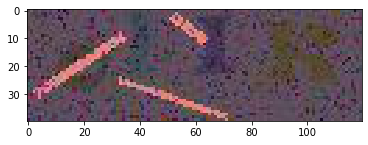

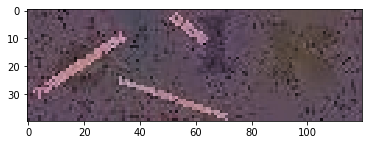

In [40]:
path = r'F:/81.jpg'
x = imread(filename=path)
b,g,r = cv2.split(x)
x=cv2.merge([r,g,b])

# 原图
plt.imshow(x)
plt.show()

# 模糊
img = cv2.fastNlMeansDenoisingColored(x, None, 5, 10, 7, 21) # (x, None, 10, 10, 7, 21)
plt.imshow(img)
plt.show()

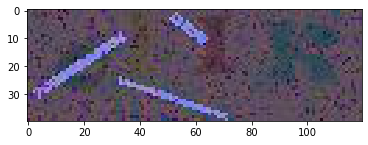

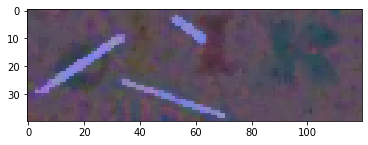

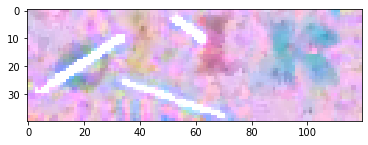

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


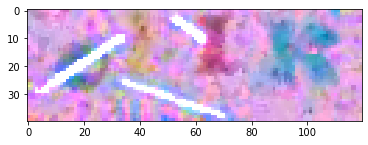

In [41]:
x = imread(filename=path)
# 原图
plt.imshow(x)
plt.show()

# 中值滤波
medBlur = cv2.medianBlur(x, ksize=3)
plt.imshow(medBlur)
plt.show()

# 亮度
light = RGBAlgorithm(medBlur, value=0.6)
plt.imshow(light)
plt.show()

# 归一化
nor = np.zeros(x.shape, dtype=np.float32)
cv2.normalize(light, dst=nor, alpha=0, beta=1,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(nor)
plt.show()


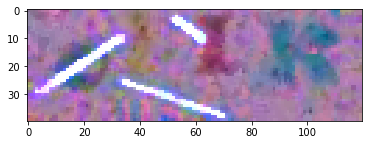

In [42]:
x = imread(filename=path)
res = utils.img_procrss(x)
plt.imshow(res)
plt.show()

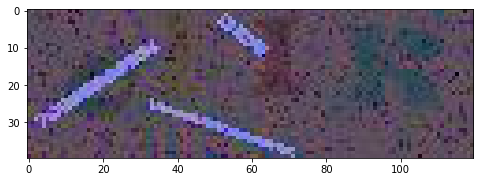

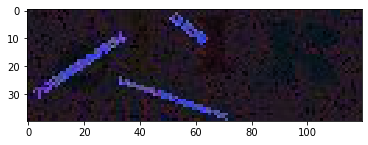

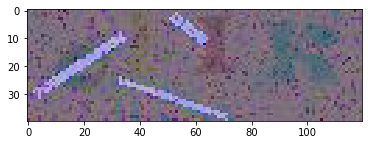

In [47]:
gam1= exposure.adjust_gamma(x, 2)   #调暗
gam2= exposure.adjust_gamma(x, 0.7)  #调亮
plt.figure('adjust_gamma',figsize=(8,8))

plt.imshow(x)
plt.show()

plt.imshow(gam1)
plt.show()

plt.imshow(gam2)
plt.show()
